In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import requests
import json
import urllib
import zipfile
import os
from collections import defaultdict

import shutil 

In [3]:
a = [("e",4),("r",2)]
sorted(a,key=lambda el:el[1])

[('r', 2), ('e', 4)]

# Load classes

In [3]:
input_data_path = "./ADE20K/code/ADE20K_2016_07_26"

def load_ADE20K_classes(input_data_path):
    from scipy.io import loadmat
    mat_path = os.path.join(input_data_path, "index_ade20k.mat")
    object_names = loadmat(mat_path)['index']['objectnames'][0][0][0]
    ADE20K_CLASSES = {}
    ADE20K_CLASSES_reverse = {}
    for i in range(len(object_names)):
        ADE20K_CLASSES[object_names[i][0]] = i+1
        ADE20K_CLASSES_reverse[i+1] = object_names[i][0]
    return ADE20K_CLASSES, ADE20K_CLASSES_reverse

ADE20K_CLASSES, ADE20K_CLASSES_reverse = load_ADE20K_classes(input_data_path)

In [3]:
COCO_ANN_URL = "http://images.cocodataset.org/annotations/annotations_trainval2017.zip"
def load_COCO(COCO_ANN_URL, tmp_path):
    import json
    zip_path, hdrs = urllib.request.urlretrieve(COCO_ANN_URL, os.path.join(tmp_path, 
                                                                           "annotations_trainval2017.zip"))
    #logger.info(f"Extracting {zip_path} to temporary folder {tmp_path}...")
    print(f"Extracting {zip_path} to temporary folder {tmp_path}...")
    with zipfile.ZipFile(f"{zip_path}", 'r') as z:
        z.extractall(f"{tmp_path}")
    annot_json_path =  os.path.join(tmp_path, 
                                    "annotations", "instances_val2017.json")
    categories = json.load(open(annot_json_path, 'r'))['categories']
    ids = list(map(lambda d: d['id'], categories))
    labels = list(map(lambda d: d['name'], categories))
    COCO_CLASSES_reverse = dict(zip(ids, labels))
    COCO_CLASSES = dict(zip(labels, ids))
    return COCO_CLASSES, COCO_CLASSES_reverse
COCO_CLASSES, COCO_CLASSES_reverse = load_COCO(COCO_ANN_URL,"./tmp")

Extracting ./tmp/annotations_trainval2017.zip to temporary folder ./tmp...


# Intersecting classes

In [4]:
def intersecting_classes():
    intersecting_ade_class = set()
    intersecting_coco = set()
    intersecting_ade_idx = set()
    mapping_ade_coco = {}
    for ade_class in ADE20K_CLASSES.keys():
        for ade_single_class in ade_class.split(", "):
            for coco_class in COCO_CLASSES.keys():
                for coco_single_class in coco_class.split(", "):
                    if ade_single_class == coco_single_class:
                        intersecting_ade_class.add(ade_class)
                        intersecting_ade_idx.add(ADE20K_CLASSES[ade_class])
                        intersecting_coco.add(coco_class)
                        mapping_ade_coco[ADE20K_CLASSES[ade_class]] = coco_class
    return intersecting_ade_class, intersecting_coco, intersecting_ade_idx, mapping_ade_coco
intersecting_ade_class, intersecting_coco, intersecting_ade_idx, mapping_ade_coco = intersecting_classes()

In [234]:
ADE20K_CLASSES

{'-': 1,
 'aarm panel': 2,
 'abacus': 3,
 'accordion, piano accordion, squeeze box': 4,
 'acropolis': 5,
 'ad, advertisement, advertizement, advertising, advertizing, advert': 6,
 'adding machine': 7,
 'advertisement board': 8,
 'aerial': 9,
 'air conditioner, air conditioning': 10,
 'air hockey table': 11,
 'air machine': 12,
 'aircraft carrier': 13,
 'airplane, aeroplane, plane': 14,
 'airport cart': 15,
 'alarm': 16,
 'alarm clock': 17,
 'alembic': 18,
 'alga': 19,
 'algae': 20,
 "altar, communion table, Lord's table": 21,
 'altarpiece': 22,
 'amphitheater': 23,
 'amphora': 24,
 'anchor': 25,
 'andiron': 26,
 'andirons': 27,
 'animal toy': 28,
 'animal, animate being, beast, brute, creature, fauna': 29,
 'animals': 30,
 'antenna': 31,
 'antenna, aerial, transmitting aerial': 32,
 'antler': 33,
 'antlers': 34,
 'anvil': 35,
 'aperture': 36,
 'apparatus': 37,
 'apparel, wearing apparel, dress, clothes': 38,
 'apple': 39,
 'apples': 40,
 'appliance': 41,
 'apron': 42,
 'aquarium': 43,


In [235]:
COCO_CLASSES

{'person': 1,
 'bicycle': 2,
 'car': 3,
 'motorcycle': 4,
 'airplane': 5,
 'bus': 6,
 'train': 7,
 'truck': 8,
 'boat': 9,
 'traffic light': 10,
 'fire hydrant': 11,
 'stop sign': 13,
 'parking meter': 14,
 'bench': 15,
 'bird': 16,
 'cat': 17,
 'dog': 18,
 'horse': 19,
 'sheep': 20,
 'cow': 21,
 'elephant': 22,
 'bear': 23,
 'zebra': 24,
 'giraffe': 25,
 'backpack': 27,
 'umbrella': 28,
 'handbag': 31,
 'tie': 32,
 'suitcase': 33,
 'frisbee': 34,
 'skis': 35,
 'snowboard': 36,
 'sports ball': 37,
 'kite': 38,
 'baseball bat': 39,
 'baseball glove': 40,
 'skateboard': 41,
 'surfboard': 42,
 'tennis racket': 43,
 'bottle': 44,
 'wine glass': 46,
 'cup': 47,
 'fork': 48,
 'knife': 49,
 'spoon': 50,
 'bowl': 51,
 'banana': 52,
 'apple': 53,
 'sandwich': 54,
 'orange': 55,
 'broccoli': 56,
 'carrot': 57,
 'hot dog': 58,
 'pizza': 59,
 'donut': 60,
 'cake': 61,
 'chair': 62,
 'couch': 63,
 'potted plant': 64,
 'bed': 65,
 'dining table': 67,
 'toilet': 70,
 'tv': 72,
 'laptop': 73,
 'mouse'

In [206]:
len(intersecting_ade_class)

68

In [204]:
len(mapping_ade_coco)

68

In [83]:
len(intersecting_coco)

61

In [90]:
# COCO class which are not in intersecting classes
for coco_class in COCO_CLASSES.keys():
    if coco_class not in intersecting_coco:
        print("Coco class:" , coco_class)
        for ade_class in ADE20K_CLASSES.keys():
            coco_split = coco_class.split(" ")
            for el in coco_split:
                if el in ade_class:
                    print("*** may correspond to:", ade_class)

Coco class: motorcycle
Coco class: stop sign
*** may correspond to: boat stop
*** may correspond to: bus stop
*** may correspond to: cork stopper
*** may correspond to: pole sign
*** may correspond to: sign
*** may correspond to: signboard, sign
*** may correspond to: ssign
*** may correspond to: stopper
*** may correspond to: street sign
*** may correspond to: traffic light, traffic signal, stoplight
*** may correspond to: traffic light, traffic signal, stoplight
Coco class: zebra
Coco class: giraffe
Coco class: frisbee
Coco class: sports ball
*** may correspond to: ball
*** may correspond to: ball rack
*** may correspond to: ball stands
*** may correspond to: ball storage
*** may correspond to: ball, globe, orb
*** may correspond to: balloon
*** may correspond to: balloons
*** may correspond to: ballots
*** may correspond to: balls rack
*** may correspond to: baseball
*** may correspond to: baseball glove
*** may correspond to: basket, basketball hoop, hoop
*** may correspond to: bas

# ADE objects stats

In [5]:
ade_img_path = "./ADE20K/code/ADE20K_2016_07_26/images/"
def intersecting_img_path(ade_img_path, intersecting_ade_idx):
    nb_total_img = 0
    intersecting_img = set()
    for root, dirs, files in os.walk(ade_img_path):
        for fn in files:
            if fn.endswith(".txt"):
                nb_total_img += 1
                with open(os.path.join(root, fn), 'r') as f:
                    content = f.read().split("\n")
                    for line in content[:-1]:
                        line = line.split(" # ")
                        if line[1] == '0':
                            ade_idx = ADE20K_CLASSES[line[3]]
                            if ade_idx in intersecting_ade_idx:
                                intersecting_img.add(os.path.join(root,fn[:-8]))
                                break
    print("nb img", nb_total_img)
    return intersecting_img


In [6]:
def is_in_coco(ade20K_class_idx):
    if ade20K_class_idx == 0:
        return None
    
    label = ADE20K_CLASSES_reverse[ade20K_class_idx].split(", ")
    for single_label in label:
        if single_label in COCO_CLASSES.keys():
            return COCO_CLASSES[single_label]
    return None

In [7]:
def count_nb_objects(intersecting_img, mapping_ade_coco):
    nb_objects = {}
    nb_obj_per_class = defaultdict(int)
    for img_path in intersecting_img:
        txt_path = img_path + "_atr.txt"
        seg_img_path = img_path + "_seg.png"
        nb_objects[img_path] = [0,0]
        with open(txt_path, 'r') as f:
            content = f.read().split("\n")
            for line in content[:-1]:
                line = line.split(" # ")
                if line[1] == '0':
                    ade_idx = ADE20K_CLASSES[line[3]]
                    nb_objects[img_path][0] += 1
                    if ade_idx in intersecting_ade_idx:
                        nb_objects[img_path][1] += 1
                        coco_class = mapping_ade_coco[ade_idx]
                        nb_obj_per_class[coco_class] += 1
    return nb_objects, nb_obj_per_class
        

In [8]:
inter_img = intersecting_img_path(ade_img_path, intersecting_ade_idx)
nb_obj, nb_obj_per_class_ade = count_nb_objects(inter_img, mapping_ade_coco)
list_all_annot = np.array(list(map(lambda k: nb_obj[k][0], nb_obj)))
list_intersect_obj = np.array(list(map(lambda k: nb_obj[k][1], nb_obj)))

nb img 22210


In [10]:
nb_obj

{'./ADE20K/code/ADE20K_2016_07_26/images/training/b/bedroom/ADE_train_00003756': [14,
  2],
 './ADE20K/code/ADE20K_2016_07_26/images/training/misc/ADE_train_00012737': [19,
  3],
 './ADE20K/code/ADE20K_2016_07_26/images/training/b/bedroom/ADE_train_00003731': [29,
  2],
 './ADE20K/code/ADE20K_2016_07_26/images/training/s/street/ADE_train_00016860': [32,
  18],
 './ADE20K/code/ADE20K_2016_07_26/images/validation/b/bathroom/ADE_val_00000103': [20,
  4],
 './ADE20K/code/ADE20K_2016_07_26/images/training/s/shed/ADE_train_00016191': [9,
  1],
 './ADE20K/code/ADE20K_2016_07_26/images/training/b/bridge/ADE_train_00004563': [11,
  3],
 './ADE20K/code/ADE20K_2016_07_26/images/validation/p/poolroom/home/ADE_val_00000988': [19,
  2],
 './ADE20K/code/ADE20K_2016_07_26/images/training/p/pagoda/ADE_train_00014946': [5,
  1],
 './ADE20K/code/ADE20K_2016_07_26/images/training/b/bedroom/ADE_train_00003583': [23,
  3],
 './ADE20K/code/ADE20K_2016_07_26/images/training/b/banquet_hall/ADE_train_00002338':

In [12]:
def subsample(nb_obj_per_img, 
              save="./coco_min_box",
              min_bbox=7):
    selected_img = []
    for img in nb_obj_per_img.keys():
        if nb_obj_per_img[img][1] > min_bbox:
            selected_img.append(img)
    random.shuffle(selected_img)
    for i,img in enumerate(selected_img):
        if i > 300:
            break
        img_name = img.split(os.sep)[-1]
        #print("copy",img+".jpg", "to ", os.path.join(save, img_name+".jpg") )
        #print("copy",img+"_seg.png", "to ", os.path.join(save, img_name+"_seg.png") )
        shutil.copy(img+".jpg",  os.path.join(save, img_name+".jpg") )
        shutil.copy(img+"_seg.png",  os.path.join(save, img_name+"_seg.png"))
        shutil.copy(img+"_atr.txt", os.path.join(save, img_name+"_atr.txt"))
    return selected_img

In [15]:

len(subsample(nb_obj))

3279

In [27]:
a = [1,2,3]
import random
random.shuffle(a)
a

[2, 3, 1]

In [121]:
np.mean(list_all_annot)

23.093688877298213

In [123]:
np.std(list_intersect_obj)

6.882932367429644

In [137]:
np.mean(list_intersect_obj)

5.437214760724997

In [127]:
np.median(list_intersect_obj)

3.0

In [150]:
np.percentile(list_intersect_obj,75)

7.0

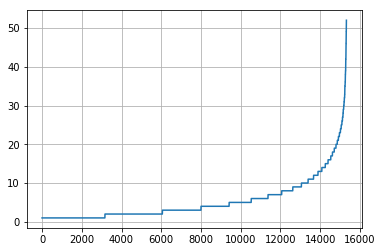

In [154]:
plt.plot(sorted(list_intersect_obj)[:-20])
plt.grid()

TypeError: first argument must be callable or None

IndexError: tuple index out of range

# COCO

In [4]:
coco_ann_path = "/home/cindy/Documents/projets/MLPerf/datasets/coco/coco/annotations/instances_val2017.json"
coco_ann_dict = json.load(open(coco_ann_path,'r'))

In [18]:
coco_ann_dict["images"][1]



{'license': 1,
 'file_name': '000000037777.jpg',
 'coco_url': 'http://images.cocodataset.org/val2017/000000037777.jpg',
 'height': 230,
 'width': 352,
 'date_captured': '2013-11-14 20:55:31',
 'flickr_url': 'http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg',
 'id': 37777}

In [15]:
151*279

42129

In [10]:
coco_ann_dict["annotations"][0].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'image_id', 'bbox', 'category_id', 'id'])

In [186]:
list_img_ids = list(map(lambda d: d["id"], coco_ann_dict['images']))
nb_obj_coco = dict(zip(list_img_ids, [0 for i in range(len(list_img_ids))])) #nb annotated objects in img
nb_box_per_class = defaultdict(int) # nb of objects labelled as class
for ann in coco_ann_dict["annotations"]:
    img_id = ann["image_id"]
    nb_obj_coco[img_id] += 1
    if COCO_CLASSES_reverse[ann["category_id"]] in intersecting_coco:
        nb_box_per_class[COCO_CLASSES_reverse[ann["category_id"]]] += 1

In [29]:
def compute_n_box_in_img():
    coco_ann_path = "/home/cindy/Documents/projets/MLPerf/datasets/coco/coco/annotations/instances_val2017.json"
    coco_ann_dict = json.load(open(coco_ann_path,'r'))
    n_box_in_img = defaultdict(int)
    for annot in coco_ann_dict["annotations"]:
        n_box_in_img[annot["image_id"]] += 1
    return n_box_in_img

In [30]:
l = np.array(list(compute_n_box_in_img().values()))

In [34]:
np.percentile(l,50
             )

4.0

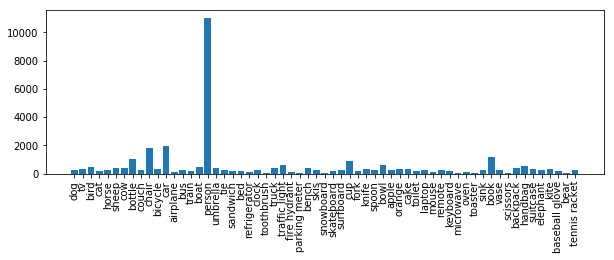

In [220]:
plt.figure(figsize=(10,3))
normalized_nb_box_per_class = dict(sorted(nb_box_per_class.items()))
normalized_nb_box_per_class = list(map(lambda k: normalized_nb_box_per_class[k]/5000,
                                      normalized_nb_box_per_class))
heights = nb_box_per_class.values()
bars = nb_box_per_class.keys()
y_pos = range(len(bars))
a = plt.bar(y_pos, heights)
# Rotation of the bars names
n = plt.xticks(y_pos, bars, rotation=90)


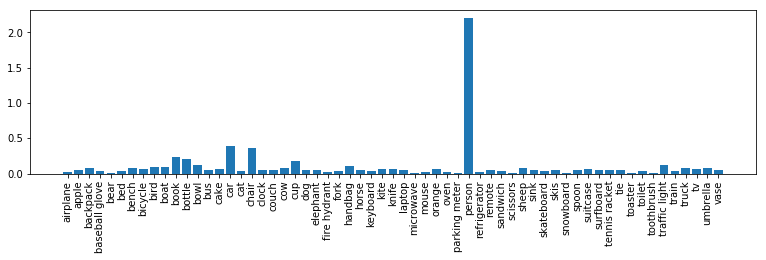

In [228]:
plt.figure(figsize=(13,3))
normalized_nb_box_per_class = dict(sorted(nb_box_per_class.items()))
heights = [el/5000 for el in normalized_nb_box_per_class.values()]
bars = normalized_nb_box_per_class.keys()
y_pos = range(len(bars))
a = plt.bar(y_pos, heights)
# Rotation of the bars names
n = plt.xticks(y_pos, bars, rotation=90)


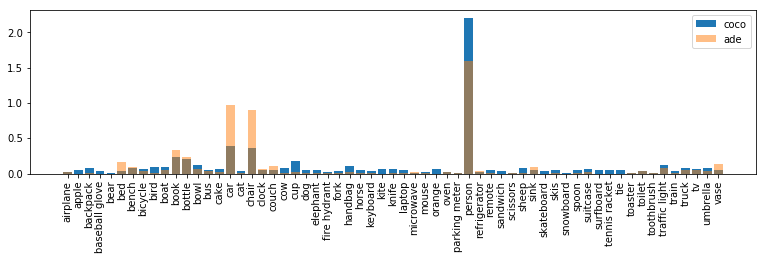

In [233]:
plt.figure(figsize=(13,3))
sorted_nb_obj_per_class_ade = dict(sorted(nb_obj_per_class_ade.items()))
heights_ade = [el/15338 for el in sorted_nb_obj_per_class_ade.values()]
heights_coco = [el/5000 for el in normalized_nb_box_per_class.values()]
bars = sorted_nb_obj_per_class_ade.keys()
y_pos = range(len(bars))
plt.bar(y_pos, heights_coco, label="coco");
plt.bar(y_pos, heights_ade, alpha=0.5, label="ade")
plt.xticks(y_pos, bars, rotation=90);
plt.legend()


In [ ]:
plt.figure(figsize=(13,3))
sorted_nb_obj_per_class_ade = dict(sorted(nb_obj_per_class_ade.items()))
heights = [el/15338 for el in sorted_nb_obj_per_class_ade.values()]
bars = sorted_nb_obj_per_class_ade.keys()
y_pos = range(len(bars))
a = plt.bar(y_pos, heights)
# Rotation of the bars names
n = plt.xticks(y_pos, bars, rotation=90)

In [178]:
list_nb_obj = list(nb_obj_coco.values())

In [179]:
np.mean(list_nb_obj)

7.3562

In [181]:
np.median(list_nb_obj)

4.0

In [ ]:
np.

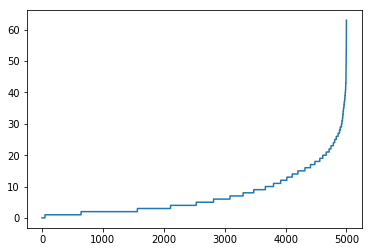

In [180]:
plt.plot(sorted(list_nb_obj))

In [56]:
def intersecting_img_path(ade_img_path):
    _,_, intersecting_ade_idx = intersecting_classes()
    
    train_path = os.path.join(ade_img_path,"training")
    val_path = os.path.join(ade_img_path,"validation")
    intersecting_img = set()
    
    for set_path in [train_path, val_path]:
        for letter in os.listdir(set_path):
            letter_path = os.path.join(set_path, letter)
            ADE_letter_classes = os.listdir(letter_path)
            for cur_class in ADE_letter_classes:
                class_path = os.path.join(letter_path, cur_class)
                for fn in os.listdir(class_path):
                    if fn.endswith(".txt"):
                        txt_path = os.path.join(class_path, fn)
                        with open(txt_path, 'r') as f:
                            content = f.read().split("\n")
                        for line in content[:-1]:
                            line = line.split(" # ")
                            if line[1] == '0':
                                ade_idx = ADE20K_CLASSES[line[3]]
                                if ade_idx in intersecting_ade_idx:
                                    intersecting_img.add(os.path.join(class_path,
                                                                     fn[:-8]))
    return intersecting_img
ade_img_path = "./ADE20K/code/ADE20K_2016_07_26/images/"
intersecting_img = intersecting_img_path(ade_img_path)

In [4]:
def get_OM(img_path):
    seg_img = plt.imread(os.path.join(folder_path, name_img+"_seg.png"))
    R = seg_img[:,:,0]*255
    G = seg_img[:,:,1]*255
    B = seg_img[:,:,2]*255
    OM = R/10*256 + G
    return OM.astype("int"), B

In [5]:
def is_in_coco(ade20K_class_idx):
    if ade20K_class_idx == 0:
        return None
    
    label = ADE20K_CLASSES_reverse[ade20K_class_idx].split(", ")
    for single_label in label:
        if single_label in COCO_CLASSES.keys():
            return COCO_CLASSES[single_label]
    return None

In [6]:
def get_bbox(OM):
    bboxes = {} #bboxes[object_id] = {"label": coco_idx_label, "bbox": [top, bot, left, right]}
    visited = np.zeros_like(OM)
    N, M = OM.shape
    object_id = 0
    for i in range(N):
        for j in range(M):
            if visited[i,j] == 0:
                coco_label = is_in_coco(OM[i,j])
                if not coco_label:
                    visited[i,j] = 1
                else:
                    print(f"coco_label {coco_label}")
                    object_id += 1
                    print(f'New object {(i,j)}')
                    update_object_bbox(OM, 
                                     visited, 
                                     i, j, 
                                     object_id,
                                     coco_label,
                                     bboxes)
    return bboxes


def update_object_bbox(OM, 
                         visited, 
                         i, j, 
                         object_id,
                         coco_label,
                         bboxes):
    
    N, M = OM.shape
    ade_label = OM[i,j]
    
    if object_id not in bboxes:
        bboxes[object_id] = {}
        bboxes[object_id]["label"] = coco_label
        bboxes[object_id]["bbox"] = {}
        bboxes[object_id]["bbox"]["top"] = i 
        bboxes[object_id]["bbox"]["bot"] = i 
        bboxes[object_id]["bbox"]["left"] = j
        bboxes[object_id]["bbox"]["right"] = j
    
    q = [(i,j)]
    cmax= 0
    while q and cmax < 1000000:
        cur_i, cur_j = q.pop(0)
        if visited[cur_i, cur_j] == 0:
            visited[cur_i, cur_j] = 1

            bboxes[object_id]["bbox"]["top"] = min(bboxes[object_id]["bbox"]["top"], cur_i) 
            bboxes[object_id]["bbox"]["bot"] = max(bboxes[object_id]["bbox"]["bot"], cur_i) 
            bboxes[object_id]["bbox"]["left"] = min(bboxes[object_id]["bbox"]["left"], cur_j) 
            bboxes[object_id]["bbox"]["right"] = max(bboxes[object_id]["bbox"]["right"], cur_j) 
            #print(f"*****current i j {(cur_i,cur_j)}")
            if cur_j+1 < M and visited[cur_i, cur_j+1] == 0 and ade_label == OM[cur_i, cur_j+1]:
                if (cur_i, cur_j+1) not in q:
                    q.append((cur_i, cur_j+1))
                    #print(f"adding {(cur_i, cur_j+1)}", q)
            if cur_i+1 < N and visited[cur_i+1, cur_j] == 0 and ade_label == OM[cur_i+1, cur_j]:
                if (cur_i+1, cur_j) not in q:
                    q.append((cur_i+1, cur_j))
                    #print(f"adding {(cur_i+1, cur_j)}", q)
            if cur_j-1 >= 0 and visited[cur_i, cur_j-1] == 0 and ade_label == OM[cur_i, cur_j-1]:
                if (cur_i, cur_j-1) not in q:
                    q.append((cur_i, cur_j-1))
                    #print(f"adding {(cur_i, cur_j-1)}", q)
            if cur_i-1 >= 0 and visited[cur_i-1, cur_j] == 0 and ade_label == OM[cur_i-1, cur_j]:
                if (cur_i-1, cur_j) not in q:
                    q.append((cur_i-1, cur_j))
                    #print(f"adding {(cur_i-1, cur_j)}", q)
        
       # if cmax%10 == 0:
        #    print(visited)
        cmax+=1
    print(visited)
        

In [7]:
def draw_bbox(img_path, bboxes):
    img = plt.imread(img_path)
    plt.imshow(img)
    for obj in bboxes.keys():
        bbox = bboxes[obj]['bbox']
        top_left = (bbox['left'], bbox['top'])
        top_right = (bbox['right'], bbox['top'])
        bot_left = (bbox['left'], bbox['bot'])
        bot_right = (bbox['right'], bbox['bot'])
        print(top_left, top_right)
        plt.plot(*top_left, 'r*')
        plt.plot(*top_right, 'r*')
        plt.plot(*bot_left, 'r*')
        plt.plot(*bot_right, 'r*')
        #plt.plot(469, 977, 'b*')

# Count intersection images

In [176]:
len(intersecting_img)

11268

In [169]:
with open(txt_path, 'r') as f:
    content = f.read().split("\n")
for line in content[:-1]:
    line = line.split(" # ")
    print(line)
    if line[1] == '0':
        ade_idx = ADE20K_CLASSES[line[3]]
        coco_label =  is_in_coco(ade_idx)
        if coco_label:
            print(COCO_CLASSES[coco_label])
        
    #print(line.split(' # '))

['001', '0', '0', 'sea', 'sea water', '""']
None
['002', '0', '0', 'ice floe, floe', 'floe', '""']
None
['003', '0', '0', 'ice floe, floe', 'floe', '""']
None
['004', '0', '0', 'seal', 'seal', '""']
None
['005', '0', '0', 'ice floe, floe', 'floe', '""']
None


In [155]:
content


'001 # 0 # 0 # sea # sea water # ""\n002 # 0 # 0 # ice floe, floe # floe # ""\n003 # 0 # 0 # ice floe, floe # floe # ""\n004 # 0 # 0 # seal # seal # ""\n005 # 0 # 0 # ice floe, floe # floe # ""\n'

In [161]:
ADE20K_CLASSES

{'-': 1,
 'aarm panel': 2,
 'abacus': 3,
 'accordion, piano accordion, squeeze box': 4,
 'acropolis': 5,
 'ad, advertisement, advertizement, advertising, advertizing, advert': 6,
 'adding machine': 7,
 'advertisement board': 8,
 'aerial': 9,
 'air conditioner, air conditioning': 10,
 'air hockey table': 11,
 'air machine': 12,
 'aircraft carrier': 13,
 'airplane, aeroplane, plane': 14,
 'airport cart': 15,
 'alarm': 16,
 'alarm clock': 17,
 'alembic': 18,
 'alga': 19,
 'algae': 20,
 "altar, communion table, Lord's table": 21,
 'altarpiece': 22,
 'amphitheater': 23,
 'amphora': 24,
 'anchor': 25,
 'andiron': 26,
 'andirons': 27,
 'animal toy': 28,
 'animal, animate being, beast, brute, creature, fauna': 29,
 'animals': 30,
 'antenna': 31,
 'antenna, aerial, transmitting aerial': 32,
 'antler': 33,
 'antlers': 34,
 'anvil': 35,
 'aperture': 36,
 'apparatus': 37,
 'apparel, wearing apparel, dress, clothes': 38,
 'apple': 39,
 'apples': 40,
 'appliance': 41,
 'apron': 42,
 'aquarium': 43,


# Format coco

In [328]:
def get_OM(img_path):
    seg_img = plt.imread(img_path)
    R = seg_img[:,:,0]*255
    G = seg_img[:,:,1]*255
    B = seg_img[:,:,2]*255
    #print(B)
    OM = R/10*256 + G
    return OM.astype("int"), B.astype("int")

In [340]:
def v2get_bbox(img_path):
    OM, B = get_OM(img_path)
    
    bboxes = {} #bboxes[object_id] = {"label": coco_idx_label, "bbox": [top, bot, left, right]}
    
    N, M = OM.shape
    
    for i in range(N):
        for j in range(M):
            coco_label = is_in_coco(OM[i,j])
            if coco_label is not None:            
                object_id = B[i,j]
                if object_id not in bboxes:
                    bboxes[object_id] = {}
                    bboxes[object_id]["label"] = coco_label
                    bboxes[object_id]["bbox"] = {}
                    bboxes[object_id]["bbox"]["top"] = i 
                    bboxes[object_id]["bbox"]["bot"] = i 
                    bboxes[object_id]["bbox"]["left"] = j
                    bboxes[object_id]["bbox"]["right"] = j

                else:
                    bboxes[object_id]["bbox"]["top"] = min(bboxes[object_id]["bbox"]["top"], i) 
                    bboxes[object_id]["bbox"]["bot"] = max(bboxes[object_id]["bbox"]["bot"], i) 
                    bboxes[object_id]["bbox"]["left"] = min(bboxes[object_id]["bbox"]["left"], j) 
                    bboxes[object_id]["bbox"]["right"] = max(bboxes[object_id]["bbox"]["right"],j) 

    return bboxes


    
def draw_bbox(img_path, bboxes):
    plt.figure()
    img = plt.imread(img_path)
    plt.imshow(img)
    for obj in bboxes.keys():
        bbox = bboxes[obj]['bbox']
        top_left = (bbox['left'], bbox['top'])
        top_right = (bbox['right'], bbox['top'])
        bot_left = (bbox['left'], bbox['bot'])
        bot_right = (bbox['right'], bbox['bot'])
        #print(top_left, top_right)
        plt.plot(*top_left, 'r*')
        plt.plot(*top_right, 'r*')
        plt.plot(*bot_left, 'r*')
        plt.plot(*bot_right, 'r*')
        #plt.plot(469, 977, 'b*')     

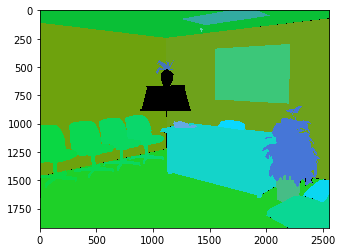

In [332]:
img = plt.imread(img_path)
plt.imshow(img)

In [337]:
bboxes = v2get_bbox(img_path)

(1920, 2560)


In [ ]:
draw_bbox(img_path=img_path,bboxes=bboxes)
idx = 0
plt.savefig(os.path.join(new_folder_path,f"test{idx:08}.png"))

In [343]:
ade_path = "./code/code/ADE20K_2016_07_26/images/"
train_path = os.path.join(ade_path,"training")
val_path =  os.path.join(ade_path,"validation")

new_folder_path = '/home/cindy/Documents/projets/MLPerf/datasets/code/code/new_img'

intersecting_img = set()
coco_label= False
for set_path in [val_path]:
    for letter in os.listdir(set_path):
        letter_path = os.path.join(set_path, letter)
        ADE_letter_classes = os.listdir(letter_path)
        for cur_class in ADE_letter_classes:
            class_path = os.path.join(letter_path, cur_class)
            for i,f in enumerate(os.listdir(class_path)):
                if f.endswith(".txt"):
                    txt_path = os.path.join(class_path, f)
                    with open(txt_path, 'r') as file_txt:
                        content = file_txt.read().split("\n")
                    for line in content[:-1]:
                        line = line.split(" # ")
                        if line[1] == '0':
                            ade_idx = ADE20K_CLASSES[line[3]]
                            coco_label = is_in_coco(ade_idx)
                            if coco_label:
                               # print(COCO_CLASSES_reverse[coco_label], txt_path.split("/")[-1])
                                intersecting_img.add(txt_path)
                    
                    if coco_label:  
                        img_path = os.path.join(class_path, f[:-8] + "_seg.png")
                        bboxes = v2get_bbox(img_path)
                        draw_bbox(img_path=img_path,bboxes=bboxes)
                        plt.savefig(os.path.join(new_folder_path,f"test{i:08}.png"))
                        plt.close()
                        img_jpg_path = os.path.join(class_path, f[:-8] + '.jpg')
                        draw_bbox(img_path=img_jpg_path, bboxes=bboxes )
                        plt.savefig(os.path.join(new_folder_path,f"test{i:08}.jpg"))
                        plt.close()
                    coco_label = False

KeyboardInterrupt: 

In [ ]:
def is_in_coco(ade20K_class_idx):
    if ade20K_class_idx == 0:
        return None
    
    label = ADE20K_CLASSES_reverse[ade20K_class_idx].split(", ")
    for single_label in label:
        if single_label in COCO_CLASSES.keys():
            return COCO_CLASSES[single_label]
    return None